In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,5)


In [2]:
enrol = pd.read_csv("../data/processed/enrolment_clean.csv")

print(enrol.shape)
enrol.head()


(983000, 8)


,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,total_enrol
0,2025-03-02,Meghalaya,East Khasi Hills,793121,11,61,37,109
1,2025-03-09,Karnataka,Bengaluru Urban,560043,14,33,39,86
2,2025-03-09,Uttar Pradesh,Kanpur Nagar,208001,29,82,12,123
3,2025-03-09,Uttar Pradesh,Aligarh,202133,62,29,15,106
4,2025-03-09,Karnataka,Bengaluru Urban,560016,14,16,21,51


In [3]:
enrol["total_enrolment"] = (
    enrol["age_0_5"] + enrol["age_5_17"] + enrol["age_18_greater"]
)


In [4]:
state_total = enrol.groupby("state")["total_enrolment"].sum().sort_values(ascending=False).head(10)

state_total


state
Uttar Pradesh     1002631
Bihar              593753
Madhya Pradesh     487892
West Bengal        369213
Maharashtra        363446
Rajasthan          340591
Gujarat            275042
Assam              225359
Karnataka          219576
Tamil Nadu         215710
Name: total_enrolment, dtype: int64

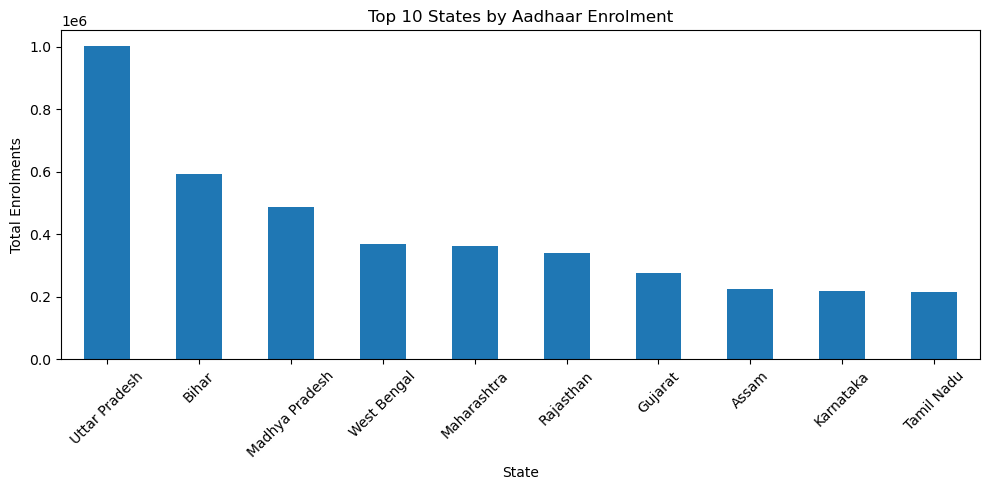

In [5]:
state_total.plot(kind="bar")
plt.title("Top 10 States by Aadhaar Enrolment")
plt.ylabel("Total Enrolments")
plt.xlabel("State")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [6]:
age_dist = enrol[["age_0_5", "age_5_17", "age_18_greater"]].sum()
age_dist


age_0_5           3474307
age_5_17          1690892
age_18_greater     166462
dtype: int64

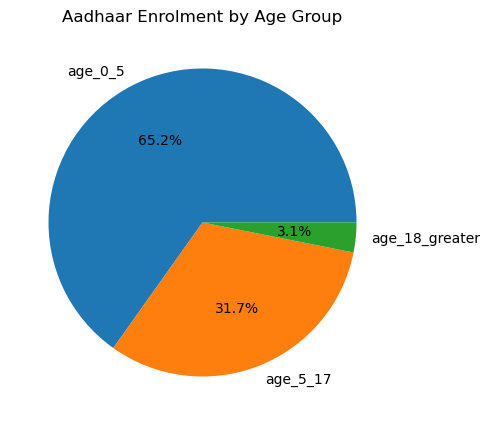

In [7]:
age_dist.plot(kind="pie", autopct="%1.1f%%")
plt.title("Aadhaar Enrolment by Age Group")
plt.ylabel("")
plt.show()


In [9]:
enrol["date"] = pd.to_datetime(enrol["date"], dayfirst=True, errors="coerce")

print(enrol["date"].dtype)


datetime64[ns]


In [10]:
enrol["month"] = enrol["date"].dt.to_period("M").astype(str)

monthly = enrol.groupby("month")["total_enrolment"].sum()

monthly.tail()


month
2025-09     139207
2025-10     148245
2025-11     114657
2025-12     117165
NaT        2709465
Name: total_enrolment, dtype: int64

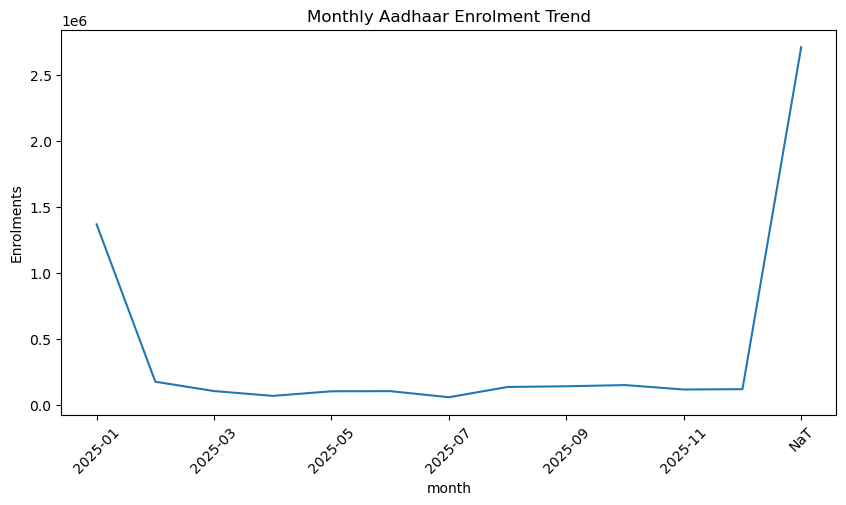

In [11]:
monthly.plot()
plt.title("Monthly Aadhaar Enrolment Trend")
plt.ylabel("Enrolments")
plt.xticks(rotation=45)
plt.show()


In [12]:
district_hotspots = (
    enrol.groupby(["state", "district"])["total_enrolment"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

district_hotspots


state          district         
Maharashtra    Thane                43142
Bihar          Sitamarhi            41652
Uttar Pradesh  Bahraich             38897
West Bengal    Murshidabad          34968
               South 24 Parganas    33090
Maharashtra    Pune                 31148
Karnataka      Bengaluru            30657
Uttar Pradesh  Sitapur              30475
Rajasthan      Jaipur               30341
Bihar          West Champaran       29913
Name: total_enrolment, dtype: int64

In [16]:
import os
import matplotlib.pyplot as plt

# Create outputs folder if it doesn't exist
os.makedirs("../outputs", exist_ok=True)

# --- Top States Enrolment Bar Chart ---
state_total.plot(kind="bar")
plt.title("Top States Enrolment")
plt.ylabel("Total Enrolments")
plt.xlabel("State")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("../outputs/top_states_enrolment.png")
plt.clf()  # Clear figure for next plot

# --- Monthly Trend Line Chart ---
monthly.plot()
plt.title("Monthly Aadhaar Enrolment Trend")
plt.ylabel("Enrolments")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("../outputs/monthly_trend.png")
plt.clf()  # Clear figure

# --- Age Group Pie Chart ---
age_dist.plot(kind="pie", autopct="%1.1f%%")
plt.title("Aadhaar Enrolment by Age Group")
plt.ylabel("")
plt.tight_layout()
plt.savefig("../outputs/age_group_distribution.png")
plt.clf()  # Clear figure

print("All graphs saved successfully in outputs folder!")


All graphs saved successfully in outputs folder!


<Figure size 1000x500 with 0 Axes>